# Decision Tree & Random Forest | Prostate_Cancer

The data, taken from Stamey et al. (1989), contains the results of biopsies on 97 men of various ages The biopsy information includes: Gleason score (gleason): scores are assigned to the two most common tumor patterns ranging from 2 to 10; in this data set, the range is from 6 to 9. Prostate-specific antigen (psa): laboratory results on protein production. Capsular penetration (cp): reach of cancer into the gland lining. Benign prostatic hyperplasia amount (bph): size of the prostate. The goal is to predict the tumor log volume (which measures the tumor’s size or spread). We try to predict this variable from five covariates (age; logarithms of bph, cp, and psa; and the Gleason score). The predicted size of the tumor has important implications for the subsequent treatment options, which include chemotherapy, radiation treatment, and surgical removal of the prostate. Here the response is a continuous measurement variable, and we are dealing with a regression tree. We use the sum of squared residuals as the impurity (fitting) criterion



* 1. Data Preprocessing
* 2. Exploratory Data Analysis
* 3. Build DecisionTreeClassifier Model
* 4. Cost Complexity Pruning_ccp_alpha
* 5. Hyper Parameter Tuning using RandomizedSearchCV
* 6. Evaluation metric
* 7. Build RandomForest model
* 8. Compare 2 models based on confusion matrix
* 9. Understanding How Feature Importance works Better in Random Forest Model

In [1]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

Automatically created module for IPython interactive environment


In [2]:
df=pd.read_csv("F:\\Prostate_Cancer.csv")

In [3]:
print(data.shape)
df.columns

(100, 10)


Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [4]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [5]:
data=df.drop(['id'],axis=1)

In [143]:
def histogram(data):
            train= data.select_dtypes(include=np.number)
            col1=train.columns
            fig = plt.figure(figsize=(5, 5))

            # loop over all numerical columns
            for i in range(0, train.shape[1]):

                                                              
                vals = np.size(train.iloc[:, i].unique())  # To set number of Bins

         # To Plot Histogram-Distribution
        
                plt.hist(train.iloc[:, i], bins=vals, color='#3F5D7D')
                plt.xticks(fontsize=15)
                plt.yticks(fontsize=15)
                plt.title(col1[i],fontsize=18) 
                plt.xlabel(col1[i], fontsize=15)
                plt.ylabel("Count", fontsize=15)
                plt.tight_layout()
                plt.show("Hitogram of "+col1[i])


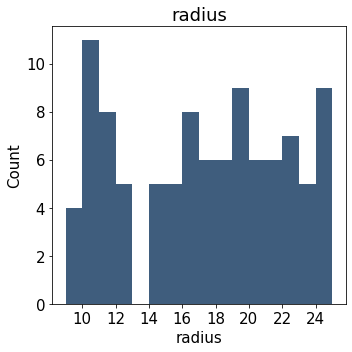

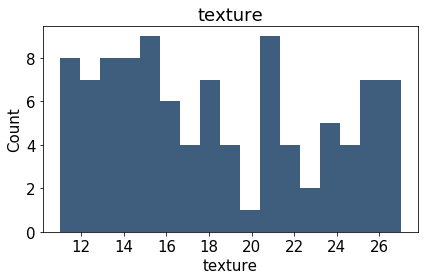

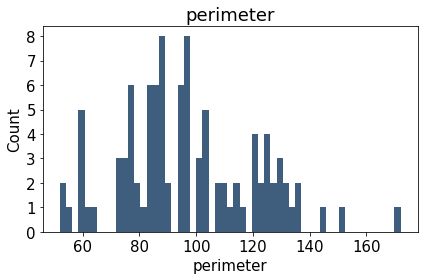

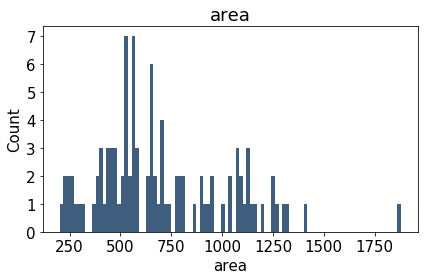

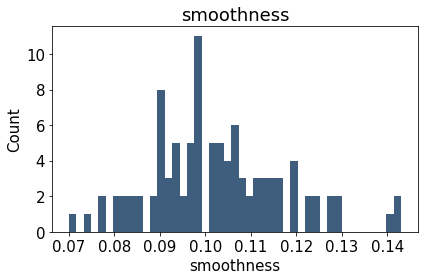

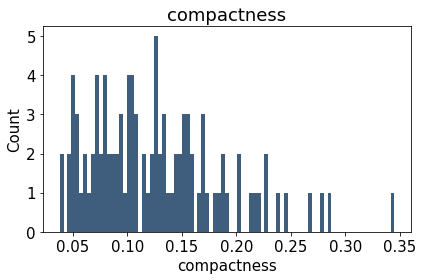

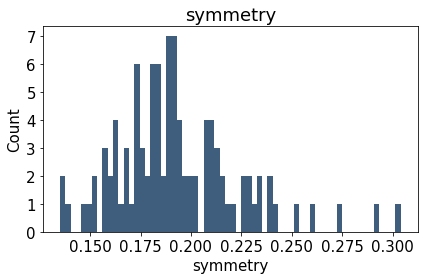

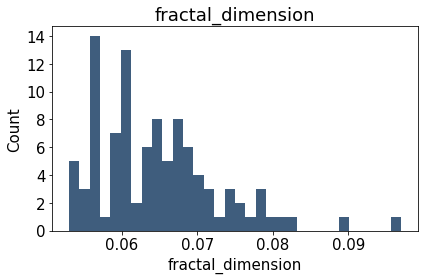

In [144]:
histogram(data)

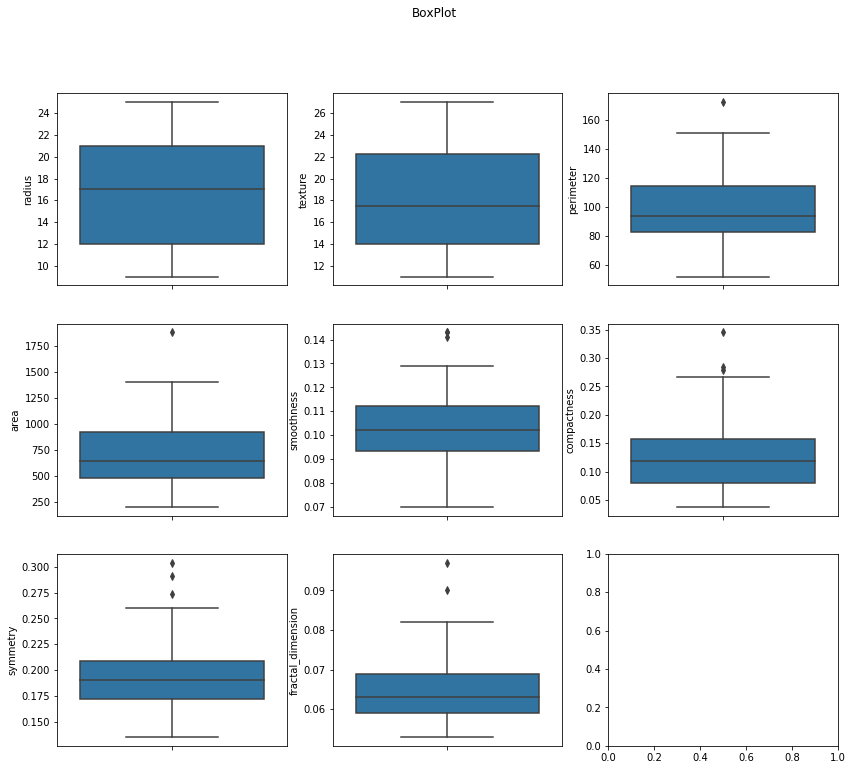

In [8]:
import seaborn as sns


fig, axes = plt.subplots(3, 3, figsize=(14, 12))

fig.suptitle('BoxPlot')

sns.boxplot(ax=axes[0, 0], data=data, y='radius')
sns.boxplot(ax=axes[0, 1], data=data, y='texture')
sns.boxplot(ax=axes[0, 2], data=data, y='perimeter')
sns.boxplot(ax=axes[1, 0], data=data, y='area')
sns.boxplot(ax=axes[1, 1], data=data, y='smoothness')
sns.boxplot(ax=axes[1, 2], data=data, y='compactness')
sns.boxplot(ax=axes[2, 0], data=data, y='symmetry')
sns.boxplot(ax=axes[2, 1], data=data, y='fractal_dimension')



plt.show()

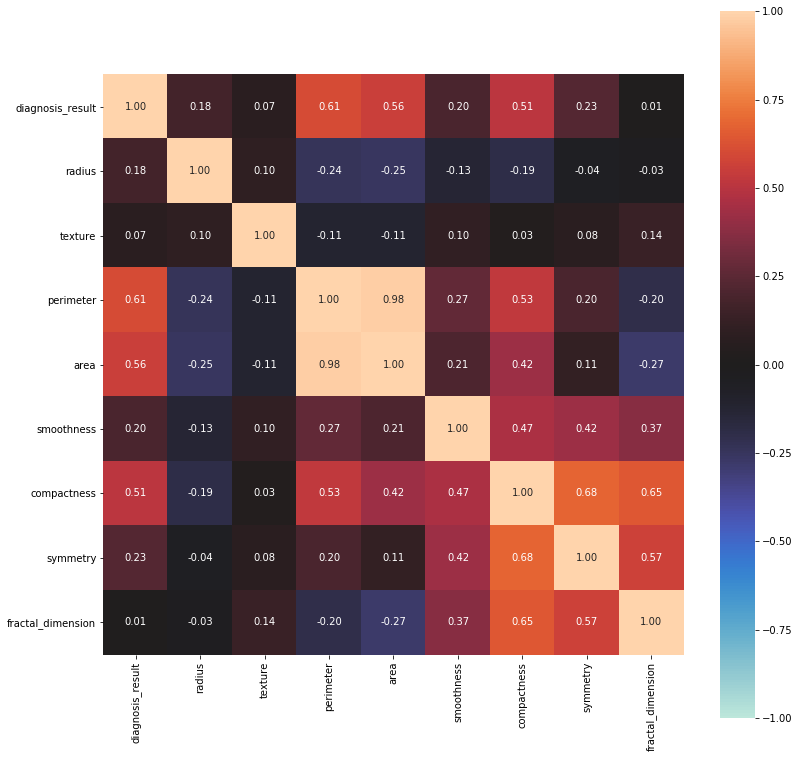

{'corr':                    diagnosis_result    radius   texture  perimeter      area  \
 diagnosis_result           1.000000  0.176967  0.070735   0.607498  0.562444   
 radius                     0.176967  1.000000  0.100245  -0.238216 -0.250934   
 texture                    0.070735  0.100245  1.000000  -0.113453 -0.113725   
 perimeter                  0.607498 -0.238216 -0.113453   1.000000  0.976648   
 area                       0.562444 -0.250934 -0.113725   0.976648  1.000000   
 smoothness                 0.197616 -0.127121  0.102321   0.269442  0.208438   
 compactness                0.512234 -0.191490  0.032446   0.527542  0.424950   
 symmetry                   0.233028 -0.039707  0.077912   0.195539  0.110435   
 fractal_dimension          0.008180 -0.029120  0.139157  -0.195434 -0.274344   
 
                    smoothness  compactness  symmetry  fractal_dimension  
 diagnosis_result     0.197616     0.512234  0.233028           0.008180  
 radius              -0.127121

In [9]:
from dython import nominal
nominal.associations(data[['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension']],figsize=(13,13))

In [10]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.drop(['diagnosis_result'],axis=1)))
print(z) 

[[1.26683005e+00 1.20574648e+00 2.30161118e+00 7.89416627e-01
  2.76420965e+00 2.48697022e+00 1.59415115e+00 1.76446414e+00]
 [1.61701072e+00 1.01220772e+00 1.53752042e+00 1.95882960e+00
  2.76420965e+00 7.84061332e-01 3.97313527e-01 9.48199109e-01]
 [8.54852801e-01 1.69733493e+00 1.41017196e+00 1.57216886e+00
  1.52865530e+00 5.47363571e-01 4.51507484e-01 5.78290484e-01]
 [5.87067586e-01 4.31591436e-01 7.97201366e-01 9.96138662e-01
  2.24664966e+00 2.58559429e+00 2.18179647e+00 3.98391589e+00]
 [1.61701072e+00 1.49024846e-01 1.62241939e+00 1.86766568e+00
  2.62692583e+00 1.03555270e-01 3.97313527e-01 7.01593359e-01]
 [1.67880731e+00 1.31025741e+00 5.84953931e-01 7.10072586e-01
  1.73458102e+00 7.11737016e-01 5.16801408e-01 1.39455552e+00]
 [1.75090333e-01 1.50379617e+00 9.85677088e-01 1.05976479e+00
  5.30601951e-01 2.90940997e-01 4.62607451e-01 9.48199109e-01]
 [3.81078959e-01 4.45139150e-02 2.87807522e-01 3.92570677e-01
  1.11680385e+00 6.29550293e-01 8.75917990e-01 1.27125264e+00]


In [11]:
threshold = 3
print(np.where(z > 3))

(array([ 3, 25, 71, 78, 78, 82, 82], dtype=int64), array([7, 6, 7, 5, 6, 2, 3], dtype=int64))


In [12]:
data_o = data[(z < 3).all(axis=1)]

In [13]:
data_o.shape

(95, 9)

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

radius                 9.0000
texture                8.2500
perimeter             31.7500
area                 440.2500
smoothness             0.0185
compactness            0.0765
symmetry               0.0370
fractal_dimension      0.0100
dtype: float64


In [15]:
data_o1 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_o1.shape

(91, 9)

In [16]:
data.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [17]:
data_o1.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,17.153846,18.230769,94.780220,678.384615,0.101220,0.118923,0.189132,0.063670
std,4.786377,5.217656,20.648273,280.429186,0.012536,0.051021,0.025098,0.006758
min,9.000000,11.000000,52.000000,202.000000,0.074000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,83.000000,488.000000,0.092000,0.077500,0.172000,0.059000
50%,18.000000,17.000000,94.000000,633.000000,0.099000,0.110000,0.189000,0.063000
75%,21.000000,22.500000,109.000000,844.000000,0.109000,0.153000,0.207500,0.068000
max,25.000000,27.000000,137.000000,1404.000000,0.129000,0.246000,0.252000,0.082000


In [18]:
X = data_o1.drop(['diagnosis_result','fractal_dimension','texture'], axis=1)

y =  data_o1.drop(['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(criterion='gini',random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
pred_train=clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train)

1.0

In [20]:
pred_test=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_test)

0.8695652173913043

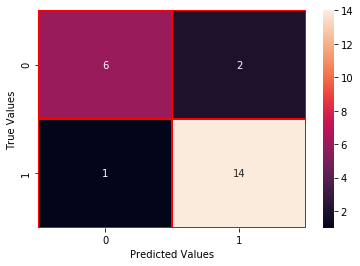

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, pred_test)

#print('Confusion matrix\n\n', cm)
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           B       0.86      0.75      0.80         8
           M       0.88      0.93      0.90        15

    accuracy                           0.87        23
   macro avg       0.87      0.84      0.85        23
weighted avg       0.87      0.87      0.87        23



[Text(453.375, 504.7714285714286, 'X[4] <= 0.097\ngini = 0.479\nsamples = 68\nvalue = [27, 41]'),
 Text(209.25, 427.11428571428576, 'X[2] <= 674.0\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(139.5, 349.4571428571429, 'X[2] <= 562.0\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(69.75, 271.8, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(209.25, 271.8, 'X[2] <= 564.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(139.5, 194.14285714285717, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 194.14285714285717, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(279.0, 349.4571428571429, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(697.5, 427.11428571428576, 'X[3] <= 0.128\ngini = 0.172\nsamples = 42\nvalue = [4, 38]'),
 Text(627.75, 349.4571428571429, 'X[1] <= 96.5\ngini = 0.095\nsamples = 40\nvalue = [2, 38]'),
 Text(558.0, 271.8, 'X[2] <= 650.0\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(418.5, 194.14285714285717, 'X[1] <= 86.5\ngini = 0.14

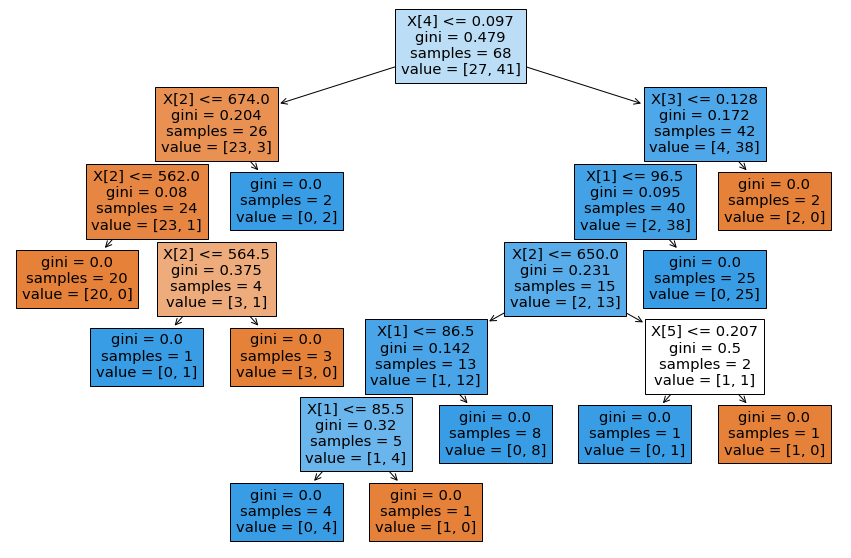

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [24]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [25]:
ccp_alphas

array([0.        , 0.01117647, 0.01409314, 0.04986802, 0.05056022,
       0.29430935])

In [26]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2943093527003562


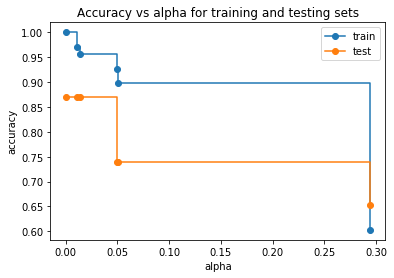

   ccp_alphas  test_scores  train_scores
0    0.000000     0.869565      1.000000
1    0.011176     0.869565      0.970588
2    0.014093     0.869565      0.955882
3    0.049868     0.739130      0.926471
4    0.050560     0.739130      0.897059
5    0.294309     0.652174      0.602941


In [27]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

result=pd.DataFrame({'ccp_alphas':ccp_alphas,'test_scores':test_scores,'train_scores':train_scores})
print(result)

In [28]:
clf_new = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
clf_new.fit(X_train,y_train)
pred=clf_new.predict(X_train)
from sklearn.metrics import accuracy_score
print('Accuracy score_Train: ',accuracy_score(y_train, pred))

prune_pred_test=clf_new.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prune_pred_test)
print('Accuracy score_Test: ',accuracy_score(y_test, prune_pred_test))

Accuracy score_Train:  0.9558823529411765
Accuracy score_Test:  0.8695652173913043


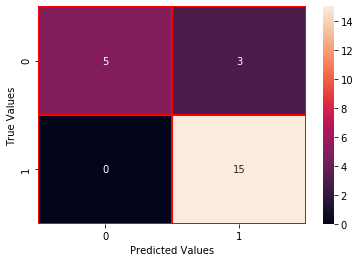

              precision    recall  f1-score   support

           B       1.00      0.62      0.77         8
           M       0.83      1.00      0.91        15

    accuracy                           0.87        23
   macro avg       0.92      0.81      0.84        23
weighted avg       0.89      0.87      0.86        23



In [29]:
import seaborn as sns
cm = confusion_matrix(y_test, prune_pred_test)

#print('Confusion matrix\n\n', cm)
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, prune_pred_test))

[Text(139.5, 135.9, 'gini = 0.479\nsamples = 68\nvalue = [27, 41]')]

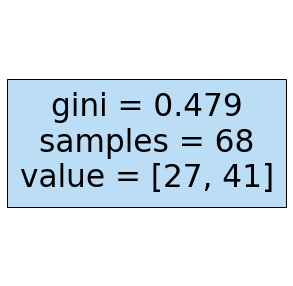

In [30]:
from sklearn import tree
plt.figure(figsize=(5,5))
tree.plot_tree(clf,filled=True)

In [31]:
clf_2 = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
pred_train_m2=clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred_train_m2)

0.6029411764705882

In [33]:
pred_test_m2=clf_2.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_test_m2)

0.8695652173913043

[Text(456.54545454545456, 509.625, 'X[4] <= 0.097\nentropy = 0.969\nsamples = 68\nvalue = [27, 41]'),
 Text(228.27272727272728, 441.675, 'X[2] <= 674.0\nentropy = 0.516\nsamples = 26\nvalue = [23, 3]'),
 Text(152.1818181818182, 373.725, 'X[2] <= 562.0\nentropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(76.0909090909091, 305.775, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(228.27272727272728, 305.775, 'X[2] <= 564.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(152.1818181818182, 237.825, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(304.3636363636364, 237.825, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(304.3636363636364, 373.725, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(684.8181818181819, 441.675, 'X[3] <= 0.128\nentropy = 0.454\nsamples = 42\nvalue = [4, 38]'),
 Text(608.7272727272727, 373.725, 'X[1] <= 96.5\nentropy = 0.286\nsamples = 40\nvalue = [2, 38]'),
 Text(532.6363636363636, 305.775, 'X[4] <= 0.13\nentropy = 0.567\nsamples =

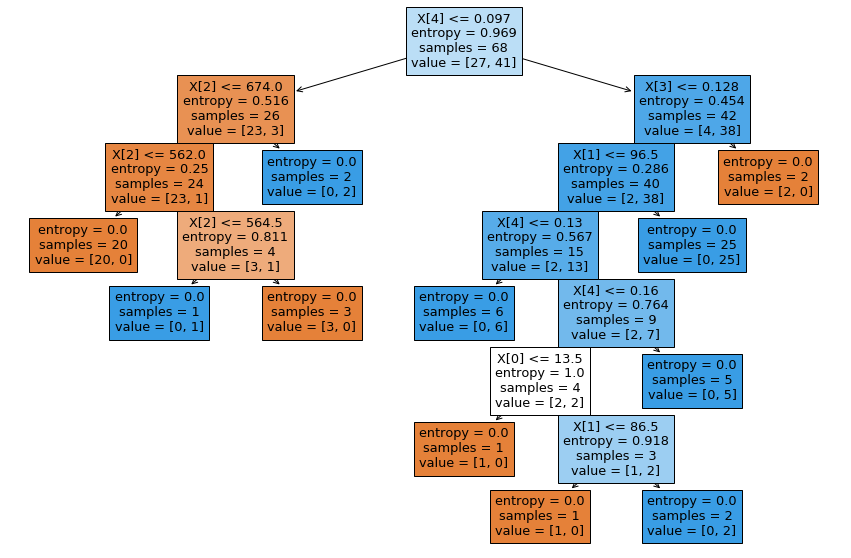

In [34]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_2,filled=True)

In [35]:
path_2 = clf_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path_2.ccp_alphas, path_2.impurities

In [36]:
clfs2 = []
for ccp_alpha in ccp_alphas:
    clf_2 = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf_2.fit(X_train, y_train)
    clfs2.append(clf_2)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs2[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4916937063415101


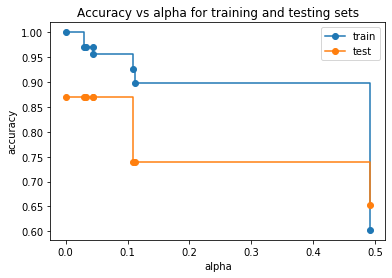

   ccp_alphas  test_scores  train_scores
0    0.000000     0.869565      1.000000
1    0.029412     0.869565      0.970588
2    0.033071     0.869565      0.970588
3    0.043503     0.869565      0.970588
4    0.044097     0.869565      0.955882
5    0.109080     0.739130      0.926471
6    0.111768     0.739130      0.897059
7    0.491694     0.652174      0.602941


In [37]:
train_scores = [clf_2.score(X_train, y_train) for clf_2 in clfs2]
test_scores = [clf_2.score(X_test, y_test) for clf_2 in clfs2]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

result=pd.DataFrame({'ccp_alphas':ccp_alphas,'test_scores':test_scores,'train_scores':train_scores})
print(result)

In [38]:
clf_2new = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.04)
clf_2new.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy', random_state=0)

In [39]:
pred_train_m2=clf_2new.predict(X_train)
from sklearn.metrics import accuracy_score
print('train_score:',accuracy_score(y_train, pred_train_m2))

pred_test_m2=clf_2new.predict(X_test)
from sklearn.metrics import accuracy_score
print('Test_score: ',accuracy_score(y_test, pred_test_m2))

train_score: 0.9705882352941176
Test_score:  0.8695652173913043


[Text(310.0, 293.54400000000004, 'X[4] <= 0.097\nentropy = 0.969\nsamples = 68\nvalue = [27, 41]'),
 Text(186.0, 228.312, 'X[2] <= 674.0\nentropy = 0.516\nsamples = 26\nvalue = [23, 3]'),
 Text(124.0, 163.08000000000004, 'X[2] <= 562.0\nentropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(62.0, 97.84800000000001, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(186.0, 97.84800000000001, 'X[2] <= 564.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(124.0, 32.61600000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(248.0, 32.61600000000004, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(248.0, 163.08000000000004, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(434.0, 228.312, 'X[3] <= 0.128\nentropy = 0.454\nsamples = 42\nvalue = [4, 38]'),
 Text(372.0, 163.08000000000004, 'X[1] <= 96.5\nentropy = 0.286\nsamples = 40\nvalue = [2, 38]'),
 Text(310.0, 97.84800000000001, 'entropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(434.0, 97.84800000000001,

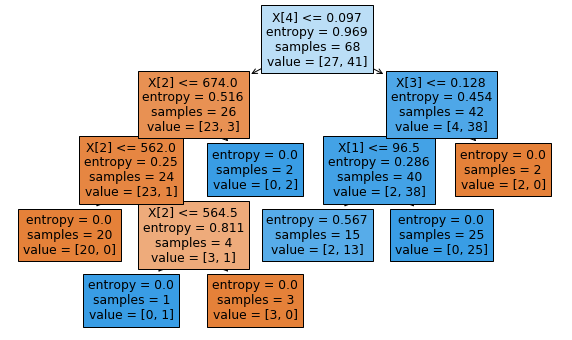

In [40]:
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(clf_2new,filled=True)

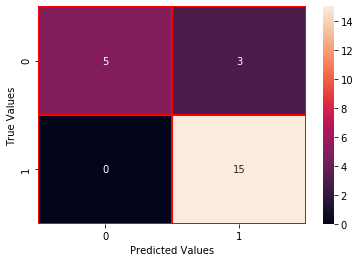

              precision    recall  f1-score   support

           B       1.00      0.62      0.77         8
           M       0.83      1.00      0.91        15

    accuracy                           0.87        23
   macro avg       0.92      0.81      0.84        23
weighted avg       0.89      0.87      0.86        23



In [41]:
cm22 = confusion_matrix(y_test, pred_test_m2)

#print('Confusion matrix\n\n', cm)
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm22,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_test_m2))

In [42]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [43]:
param_dist={'max_depth':[0,1,2,3,4,5,6,7,8,9,10,None],'min_samples_leaf':randint(1,9),"criterion":['gini','entropy']}

In [44]:
tree=DecisionTreeClassifier(random_state=42)

In [45]:
tree_cv=RandomizedSearchCV(tree,param_dist,cv=4)

In [46]:
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000CF3C9C8>})

In [47]:
print('Best_params:' ,tree_cv.best_params_)
print('Mean_test_score : ',tree_cv.best_score_)

Best_params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6}
Mean_test_score :  0.838235294117647


In [48]:
cv_results=pd.DataFrame(tree_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00525,4.330157e-04,0.017251,2.641523e-02,gini,None,6,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.941176,0.882353,0.764706,0.764706,0.838235,0.076414,1
1,0.00525,4.328781e-04,0.002000,7.073084e-04,entropy,5,4,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764706,0.823529,0.764706,0.823529,0.794118,0.029412,6
2,0.00500,2.064765e-07,0.001750,4.331534e-04,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.941176,0.882353,0.764706,0.764706,0.838235,0.076414,1
3,0.00475,4.330846e-04,0.002000,1.192093e-07,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.941176,0.882353,0.764706,0.764706,0.838235,0.076414,1
4,0.00500,0.000000e+00,0.002000,0.000000e+00,entropy,6,4,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.764706,0.823529,0.764706,0.823529,0.794118,0.029412,6
5,0.00500,1.192093e-07,0.001750,4.329813e-04,entropy,None,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.941176,0.882353,0.764706,0.764706,0.838235,0.076414,1
6,0.00500,1.192093e-07,0.002000,1.032383e-07,entropy,6,1,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.764706,0.705882,0.823529,0.764706,0.764706,0.041595,10
7,0.00475,4.330502e-04,0.002000,1.976862e-07,gini,6,2,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.882353,0.647059,0.823529,0.764706,0.779412,0.087001,8
8,0.00525,4.331534e-04,0.002000,1.032383e-07,entropy,3,1,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.764706,0.823529,0.823529,0.764706,0.794118,0.029412,5
9,0.00475,4.330157e-04,0.001750,4.330157e-04,entropy,3,4,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.764706,0.823529,0.764706,0.764706,0.779412,0.025471,8


In [49]:
clf_check = DecisionTreeClassifier(random_state=42,criterion='entropy',min_samples_leaf=7,max_depth=6)
clf_check.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       random_state=42)

In [50]:
pred11=tree_cv.predict(X_train)
from sklearn.metrics import accuracy_score
print('Accuracy score_Train: ',accuracy_score(y_train, pred11))

prune_pred_test11=tree_cv.predict(X_test)
from sklearn.metrics import accuracy_score
DecisionTree_accuracy=accuracy_score(y_test, prune_pred_test11)
print('Accuracy score_Test: ',DecisionTree_accuracy)

Accuracy score_Train:  0.8970588235294118
Accuracy score_Test:  0.7391304347826086


## Cross Validation Method

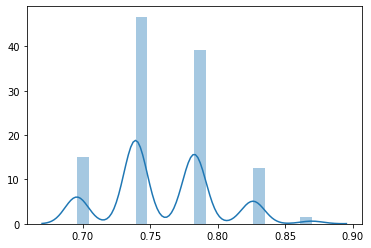

In [51]:
model_accuracies = []

for i in range(1000):
    (train_X,
     train_y,
     test_X,
     test_y) = train_test_split(X, y, random_state=42, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(train_X, test_X)
    classifier_accuracy = decision_tree_classifier.score(train_y, test_y)
    model_accuracies.append(classifier_accuracy)
    
sns.distplot(model_accuracies)

Text(0.5, 1.0, 'Average score: 0.8466666666666667')

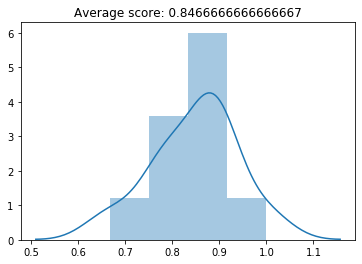

In [52]:
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier(random_state=42)
cv_scores = cross_val_score(dtc, X, y, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=0)

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}
#y['diagnosis_result'].replace(('M','B'),(1,0),inplace=True)

cross_validation = StratifiedKFold(n_splits=10)
k=cross_validation.get_n_splits(y)
grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=k)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtc = grid_search.best_estimator_
dtc

Best score: 0.8922222222222222
Best parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'splitter': 'random'}


DecisionTreeClassifier(max_depth=2, max_features=3, random_state=0,
                       splitter='random')

Text(0.5, 1.0, 'Average score: 0.8906432748538011')

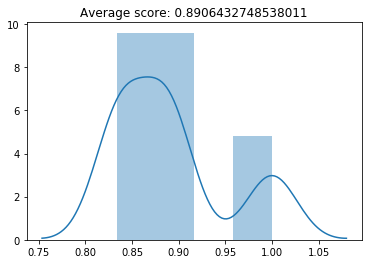

In [54]:
cv_scores = cross_val_score(dtc, X, y)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [55]:
clf_check5 = DecisionTreeClassifier(random_state=42,criterion='gini',max_features=3,max_depth=2)
clf_check5.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features=3, random_state=42)

In [56]:
pred5=tree_cv.predict(X_train)
from sklearn.metrics import accuracy_score
print('Accuracy score_Train: ',accuracy_score(y_train, pred5))

prune_pred_test5=tree_cv.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prune_pred_test5)
print('Accuracy score_Test: ',accuracy_score(y_test, prune_pred_test5))

Accuracy score_Train:  0.8970588235294118
Accuracy score_Test:  0.7391304347826086


## Model 2 : Building Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

Binary_y_train=y_train['diagnosis_result']
Binary_y_test=y_test['diagnosis_result']

rfc=RandomForestClassifier(criterion='entropy',random_state=42)
rfc.fit(X_train,Binary_y_train)

#Evaluating on training set

rfc_pred_train=rfc.predict(X_train)
print('Training set Evaluation F1-score=>',f1_score(Binary_y_train,rfc_pred_train))

Training set Evaluation F1-score=> 1.0


Accuracy :  0.8260869565217391


Testing Set Evaluation F1-Score=> 0.8190993788819875


              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.82      0.93      0.87        15

    accuracy                           0.83        23
   macro avg       0.83      0.78      0.79        23
weighted avg       0.83      0.83      0.82        23



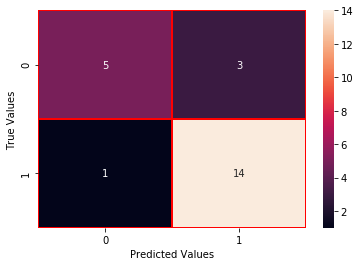

In [108]:
#Evaluating on test set

rfc_pred_test=rfc.predict(X_test)
rfc_accuracy=accuracy_score(y_test,rfc_pred_test)
print("Accuracy : ",rfc_accuracy)
print('\n')
rfc_f1_score=f1_score(y_test,rfc_pred_test,average='weighted')
print('Testing Set Evaluation F1-Score=>',rfc_f1_score)
print('\n')

print(classification_report(y_test,rfc_pred_test))


confusionMatrix = confusion_matrix(y_test,rfc_pred_test)

#print('Confusion matrix\n\n', cm)
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusionMatrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

## Comparing the Results of 2 models 

In [110]:
from pandas import DataFrame


new_method1={'Classifier': 'Decision Tree','Test_accuracy':DecisionTree_accuracy}
new_method2={'Classifier': 'RandomForestClassifier','Test_accuracy':rfc_accuracy}


data_table=DataFrame()

data_table=data_table.append([new_method1,new_method2],ignore_index=True)

data_table

,Classifier,Test_accuracy
0,Decision Tree,0.739130
1,RandomForestClassifier,0.826087


Here, we can see that Random Forest model performed much better than the decision tree in the out-of-sample evaluation

## Why did RFM Outperform the Decision tree ?

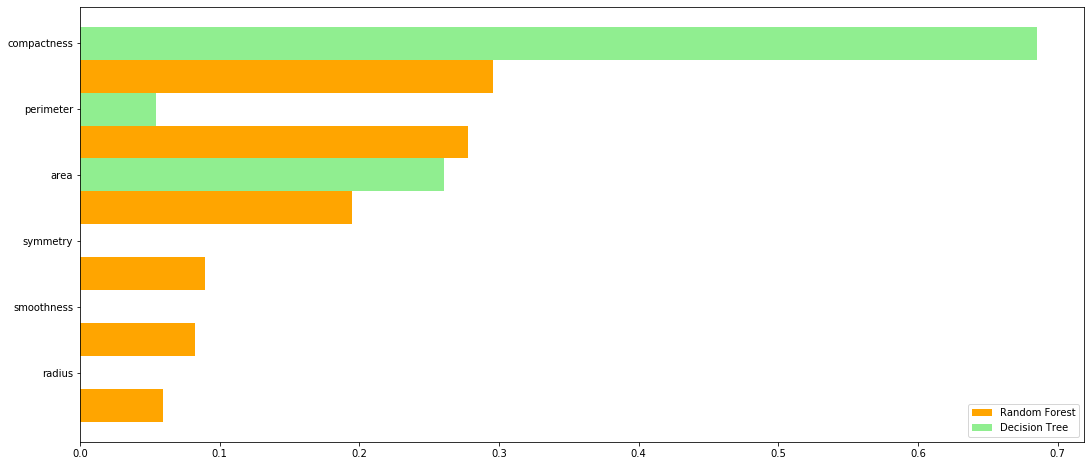

In [120]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':dtc.feature_importances_},
    index=df.drop(columns=['id', 'diagnosis_result', 'texture', 'fractal_dimension']).columns)
    
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.5,color='Orange',label='Random Forest')
dt_feature=ax.barh(index+0.5,feature_importance['dt'],0.5,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.5,yticklabels=feature_importance.index)

ax.legend()
plt.show()

### As you can clearly see in the above graph, the decision tree model gives high importance to a particular set of features. But the random forest chooses features randomly during the training process. Therefore, it does not depend highly on any specific set of features. This is a special characteristic of random forest over bagging trees.